## Engenharia de Sistemas de Software Inteligentes - Profs. Marcos Kalinowski e Tatiana Escovedo
## Aula 02: Prática de Machine Learning em Python

In [1]:
# configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

# Imports necessários
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
# Machine Learning
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

## Carga do Dataset

In [2]:
# Informa a URL de importação do dataset
url = "https://raw.githubusercontent.com/vitaledu/dataset_MVP_SI_AAPL_ML/main/AAPL.csv"

# Lê o arquivo
dataset = pd.read_csv(url, delimiter=',')

# Substitui 'POSITIVO' por 1 e 'NEGATIVO' por 0
#dataset = dataset.replace({'POSITIVO': 1, 'NEGATIVO': 0})
def normalize(value):
    if value > 321904084:
        return 1
    else:
        return 0

# Aplicar a função à coluna de número 6 do dataset
dataset.iloc[:, 6] = dataset.iloc[:, 6].apply(normalize)

# Remove as linhas com valores NaN
dataset = dataset.dropna()

# Mostra as primeiras linhas do dataset
dataset.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.099319,1
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094137,0
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.087228,0
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089387,0
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.091978,0
5,1980-12-19,0.126116,0.126674,0.126116,0.126116,0.097591,0
6,1980-12-22,0.132254,0.132813,0.132254,0.132254,0.102341,0
7,1980-12-23,0.137835,0.138393,0.137835,0.137835,0.106660,0
8,1980-12-24,0.145089,0.145647,0.145089,0.145089,0.112273,0
9,1980-12-26,0.158482,0.159040,0.158482,0.158482,0.122637,0


## Separação em conjunto de treino e conjunto de teste com holdout

In [3]:
test_size = 0.20 # tamanho do conjunto de teste
seed = 7 # semente aleatória

# Separação em conjuntos de treino e teste
array = dataset.values

# Entrada
X = array[:,1:6] # Todas as colunas exceto a primeira
# Saida
y = array[:,6] # Coluna 7
y = y.astype(float)

print("Valores de entrada X:")
print(X)

print("\nValores de saída y:")
print(y)

X_train, X_test, y_train, y_test = train_test_split(X, y,
    test_size=test_size, shuffle=True, random_state=seed, stratify=y) # holdout com estratificação

# Parâmetros e partições da validação cruzada
scoring = 'accuracy'
num_particoes = 10
kfold = StratifiedKFold(n_splits=num_particoes, shuffle=True, random_state=seed) # validação cruzada com estratificação

Valores de entrada X:
[[0.128348 0.128906 0.128348 0.128348 0.099319]
 [0.12221 0.12221 0.121652 0.121652 0.094137]
 [0.113281 0.113281 0.112723 0.112723 0.087228]
 ...
 [190.330002 191.559998 189.229996 191.240005 191.240005]
 [189.979996 190.050003 187.449997 189.429993 189.429993]
 [190.210007 194.399994 190.179993 193.419998 193.419998]]

Valores de saída y:
[1. 0. 0. ... 0. 0. 0.]


## Modelagem e Inferência

### Criação e avaliação de modelos: linha base

KNN: 0.863406 (0.005816)
CART: 0.832834 (0.007735)
NB: 0.533111 (0.014721)
SVM: 0.796727 (0.011449)


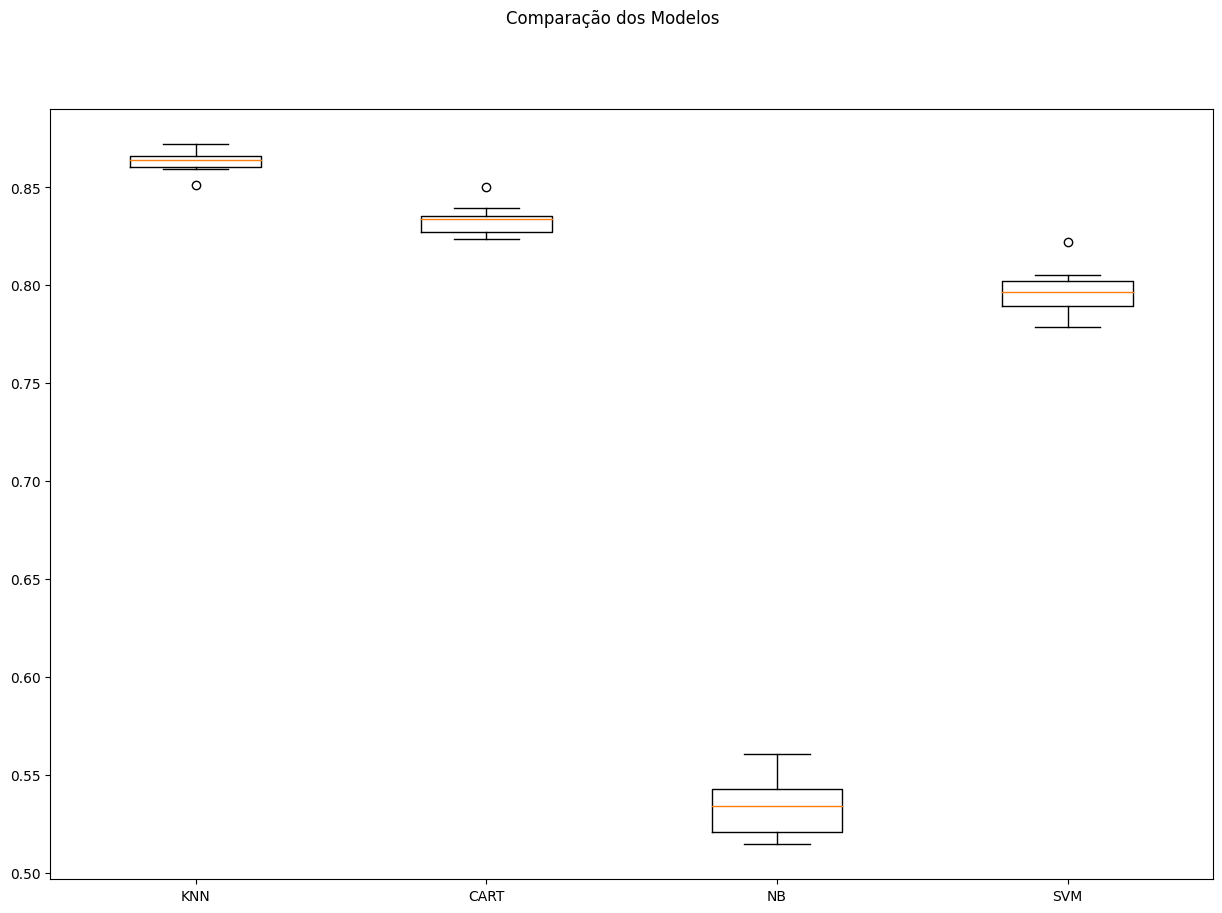

In [4]:
np.random.seed(7) # definindo uma semente global

# Lista que armazenará os modelos
models = []

# Criando os modelos e adicionando-os na lista de modelos
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# Listas para armazenar os resultados
results = []
names = []

# Avaliação dos modelos
for name, model in models:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(15,10))
fig.suptitle('Comparação dos Modelos')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

### Criação e avaliação de modelos: dados padronizados e normalizados

KNN-orig: 0.863 (0.006)
CART-orig: 0.833 (0.008)
NB-orig: 0.533 (0.015)
SVM-orig: 0.797 (0.011)
KNN-padr: 0.864 (0.005)
CART-padr: 0.832 (0.008)
NB-padr: 0.533 (0.015)
SVM-padr: 0.797 (0.011)
KNN-norm: 0.864 (0.006)
CART-norm: 0.832 (0.007)
NB-norm: 0.533 (0.015)
SVM-norm: 0.797 (0.011)


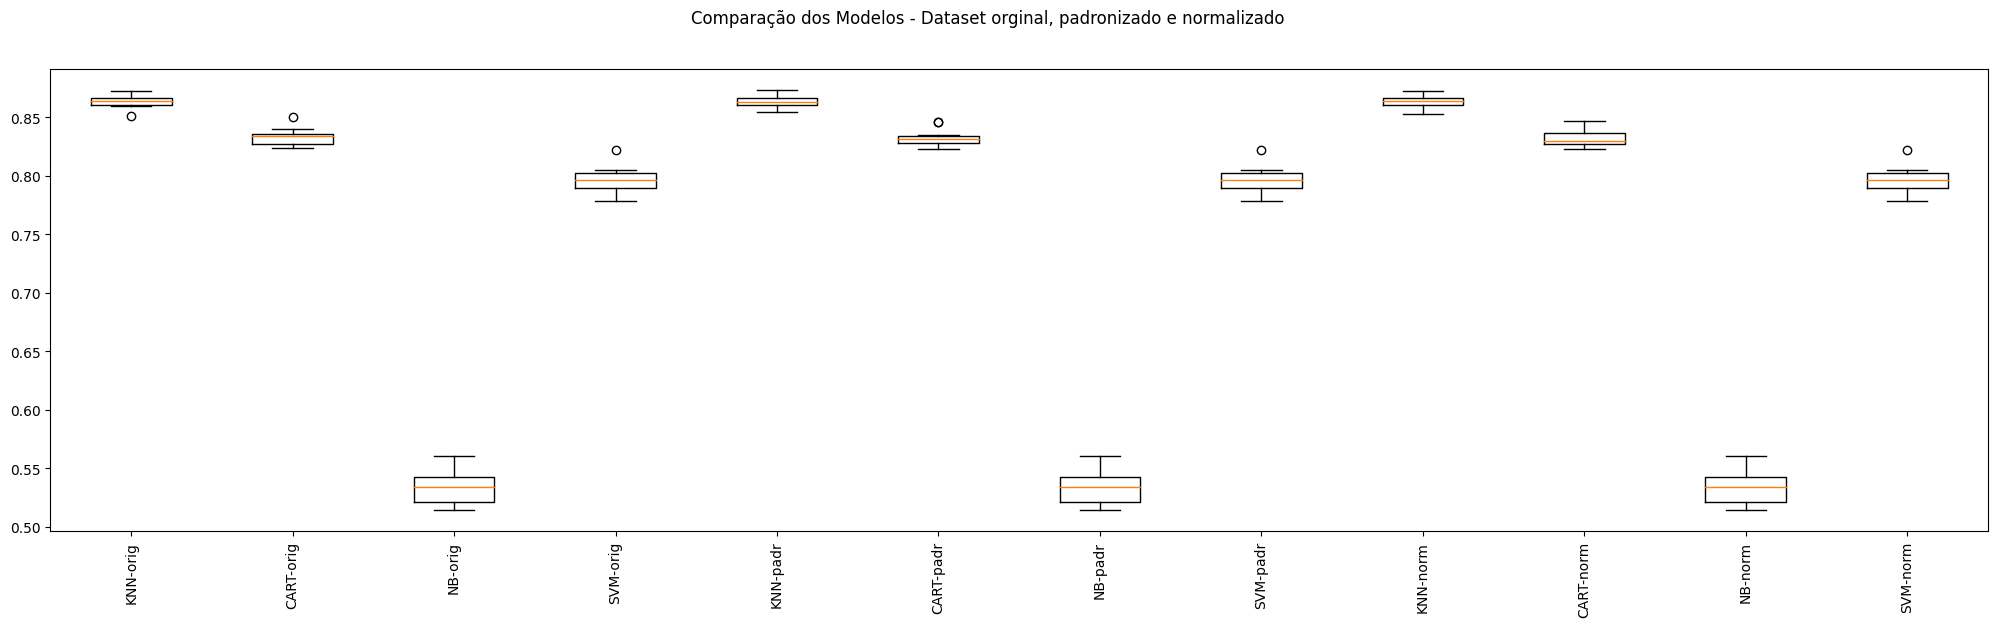

In [5]:
np.random.seed(7) # definindo uma semente global para este bloco

# Listas para armazenar os armazenar os pipelines e os resultados para todas as visões do dataset
pipelines = []
results = []
names = []


# Criando os elementos do pipeline

# Algoritmos que serão utilizados
knn = ('KNN', KNeighborsClassifier())
cart = ('CART', DecisionTreeClassifier())
naive_bayes = ('NB', GaussianNB())
svm = ('SVM', SVC())

# Transformações que serão utilizadas
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())


# Montando os pipelines

# Dataset original
pipelines.append(('KNN-orig', Pipeline([knn])))
pipelines.append(('CART-orig', Pipeline([cart])))
pipelines.append(('NB-orig', Pipeline([naive_bayes])))
pipelines.append(('SVM-orig', Pipeline([svm])))

# Dataset Padronizado
pipelines.append(('KNN-padr', Pipeline([standard_scaler, knn])))
pipelines.append(('CART-padr', Pipeline([standard_scaler, cart])))
pipelines.append(('NB-padr', Pipeline([standard_scaler, naive_bayes])))
pipelines.append(('SVM-padr', Pipeline([standard_scaler, svm])))

# Dataset Normalizadochrome-extension://mcgbeeipkmelnpldkobichboakdfaeon/images/logo-vertical.svg
pipelines.append(('KNN-norm', Pipeline([min_max_scaler, knn])))
pipelines.append(('CART-norm', Pipeline([min_max_scaler, cart])))
pipelines.append(('NB-norm', Pipeline([min_max_scaler, naive_bayes])))
pipelines.append(('SVM-norm', Pipeline([min_max_scaler, svm])))

# Executando os pipelines
for name, model in pipelines:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %.3f (%.3f)" % (name, cv_results.mean(), cv_results.std()) # formatando para 3 casas decimais
    print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(25,6))
fig.suptitle('Comparação dos Modelos - Dataset orginal, padronizado e normalizado')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names, rotation=90)
plt.show()

### Otimização dos hiperparâmetros

In [6]:
# Tuning do KNN

np.random.seed(7) # definindo uma semente global para este bloco

pipelines = []

# Definindo os componentes do pipeline
knn = ('KNN', KNeighborsClassifier())
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())

pipelines.append(('knn-orig', Pipeline(steps=[knn])))
pipelines.append(('knn-padr', Pipeline(steps=[standard_scaler, knn])))
pipelines.append(('knn-norm', Pipeline(steps=[min_max_scaler, knn])))

param_grid = {
    'KNN__n_neighbors': [1,3,5,7,9,11,13,15,17,19,21],
    'KNN__metric': ["euclidean", "manhattan", "minkowski"],
}

# Prepara e executa o GridSearchCV
for name, model in pipelines:
    grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
    grid.fit(X_train, y_train)
    # imprime a melhor configuração
    print("Sem tratamento de missings: %s - Melhor: %f usando %s" % (name, grid.best_score_, grid.best_params_))

Sem tratamento de missings: knn-orig - Melhor: 0.866983 usando {'KNN__metric': 'euclidean', 'KNN__n_neighbors': 9}
Sem tratamento de missings: knn-padr - Melhor: 0.866176 usando {'KNN__metric': 'euclidean', 'KNN__n_neighbors': 11}
Sem tratamento de missings: knn-norm - Melhor: 0.866752 usando {'KNN__metric': 'euclidean', 'KNN__n_neighbors': 9}


## Finalização do Modelo

In [7]:
# Avaliação do modelo com o conjunto de testes

# Preparação do modelo
scaler = StandardScaler().fit(X_train) # ajuste do scaler com o conjunto de treino
rescaledX = scaler.transform(X_train) # aplicação da padronização no conjunto de treino
model = KNeighborsClassifier(metric='manhattan', n_neighbors=11)
model.fit(rescaledX, y_train)

# Estimativa da acurácia no conjunto de teste
rescaledTestX = scaler.transform(X_test) # aplicação da padronização no conjunto de teste
predictions = model.predict(rescaledTestX)
print(accuracy_score(y_test, predictions))

0.863929889298893


In [8]:
# Preparação do modelo com TODO o dataset
scaler = StandardScaler().fit(X) # ajuste do scaler com TODO o dataset
rescaledX = scaler.transform(X) # aplicação da padronização com TODO o dataset
model.fit(rescaledX, y)

KNeighborsClassifier(metric='manhattan', n_neighbors=11)

## Simulando a aplicação do modelo em dados não vistos

In [9]:
# Novos dados - não sabemos a classe!

# idade	rt_pcr	leucocitos	basofilos	creatinina	proteina_c	hemoglobina
data = {'Open':  [0.503348, 0.122768, 0.146763],
        'High': [0.517857, 0.134487, 0.141183],
        'Low': [0.453125, 0.129464, 0.141183],
        'Close': [0.459821, 0.144531, 0.156763],
        'Adj Close': [0.389781, 0.097591, 0.107524]
        }

atributos = ['Open', 'High', 'Low', 'Close', 'Adj Close']
entrada = pd.DataFrame(data, columns=atributos)

array_entrada = entrada.values
X_entrada = array_entrada[:,0:5].astype(float)  # Seleciona todas as 6 colunas

# Padronização nos dados de entrada usando o scaler utilizado em X
rescaledEntradaX = scaler.transform(X_entrada)
print(rescaledEntradaX)

[[-0.46576623 -0.46546331 -0.46677778 -0.46670953 -0.45470673]
 [-0.47496012 -0.4746217  -0.47467884 -0.47431902 -0.46182842]
 [-0.47438046 -0.47446174 -0.47439277 -0.47402381 -0.46158632]]


In [10]:
# Predição de classes dos dados de entrada
saidas = model.predict(rescaledEntradaX)
print(saidas)

[1. 0. 0.]


**Fazendo o download do arquivo pkl**

In [11]:
import pickle
from google.colab import files

# Salvar o modelo usando pickle
with open('classificador.pkl', 'wb') as pickle_out:
    pickle.dump(model, pickle_out)

# Baixar o arquivo para o ambiente local
files.download('classificador.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Fazendo o download do arquivo joblib**

In [12]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from joblib import dump

# Seus dados de treinamento
data = {'Open':  [0.513345, 0.125568, 0.146763],
        'High': [0.617857, 0.124487, 0.141283],
        'Low': [0.453125, 0.123464, 0.141483],
        'Close': [0.754821, 0.146531, 0.156763],
        'Adj Close': [0.583781, 0.095591, 0.107324]
        }

atributos = ['Open', 'High', 'Low', 'Close', 'Adj Close']
entrada = pd.DataFrame(data, columns=atributos)

# Extrair as features
New_X_train = entrada.values.astype(float)

# Inicializar o StandardScaler
scaler = StandardScaler()

# Ajustar o scaler aos dados de treinamento e transformar os dados
X_train_scaled = scaler.fit_transform(New_X_train)

# Salvar o scaler em um arquivo
dump(scaler, 'scaler.joblib')

# Fazer o download do arquivo
files.download('scaler.joblib')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Regressão Linear**

In [13]:
import pandas as pd
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from pickle import dump
from pickle import load

In [14]:
# Cria o modelo
modelo = LogisticRegression(solver='liblinear')

# Treina o modelo
modelo.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [15]:
# Salva o modelo no disco
filename = 'apple_lr.pkl'
dump(modelo, open(filename, 'wb'))

**Carrega o modelo**

In [16]:
# Algum tempo depois...
# Carrega o modelo do disco
loaded_model = load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
print(result)

0.7809040590405905


In [17]:
# Baixar o arquivo para o ambiente local
files.download('apple_lr.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>